In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [6]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

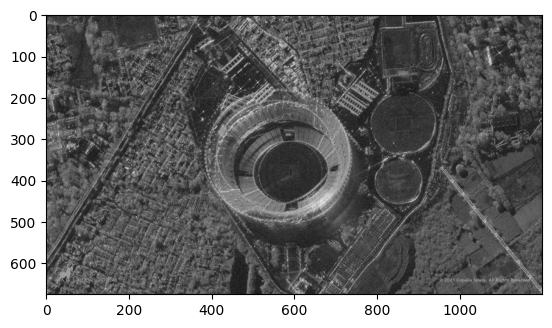

In [7]:
plt.imshow(image_gray, cmap="gray")

In [8]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]],
      shape=(675, 1200), dtype=uint8)

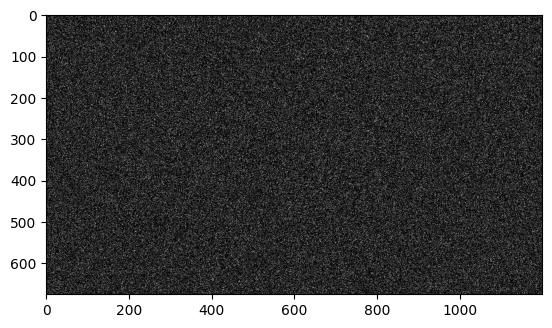

In [9]:
plt.imshow(noise_gauss, cmap="gray")

In [10]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [11]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [12]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

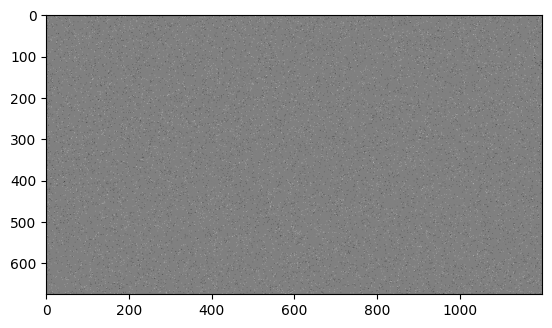

In [13]:
plt.imshow(bg_image, cmap="gray")

In [14]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

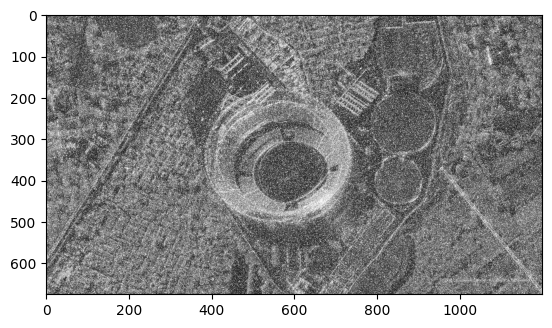

In [15]:
plt.imshow(image_noise_gauss, cmap="gray")

In [16]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [17]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [18]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [19]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


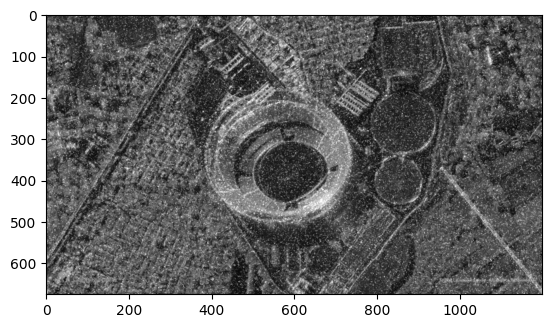

In [20]:
plt.imshow(image_gauss_median, cmap="gray")

In [21]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

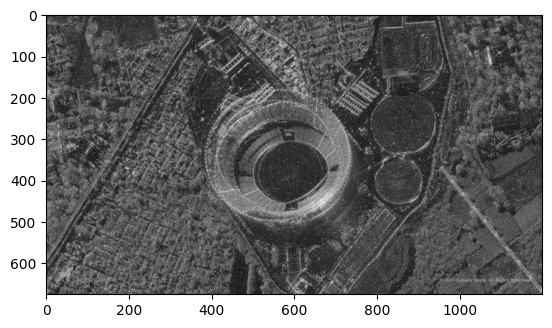

In [22]:
plt.imshow(image_sp, cmap="gray")

In [23]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

390.75972962962965 0.7186415393034888


In [24]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [25]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.72464567901234 0.8162373740266431


# Другие типы фильтров

In [26]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [27]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [28]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [29]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\liosh\AppData\Local\Temp\ipykernel_14268\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


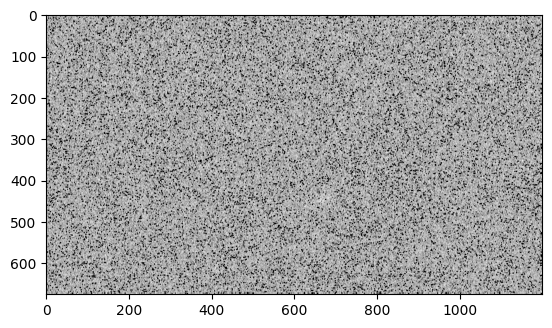

In [30]:
plt.imshow(res, cmap="gray")

In [31]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [32]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [33]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [34]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [35]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

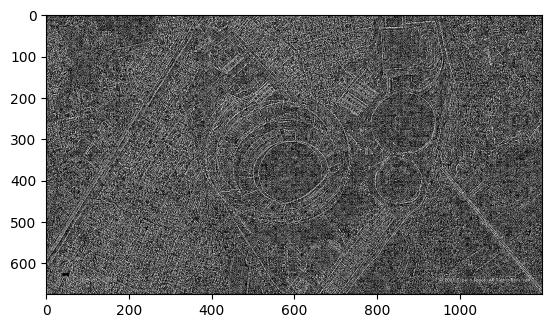

In [36]:
plt.imshow(image_lapl, cmap="gray")

In [37]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

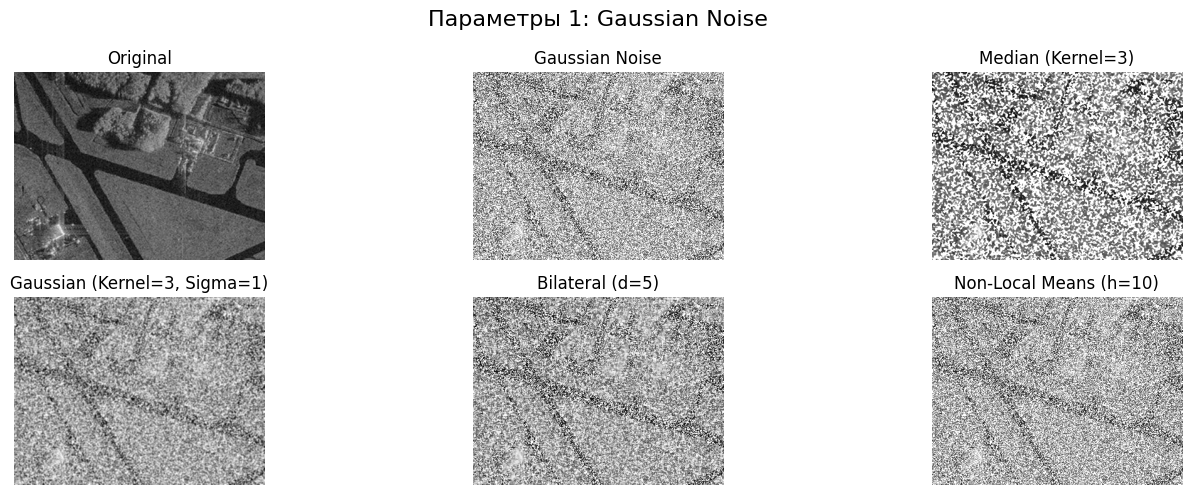

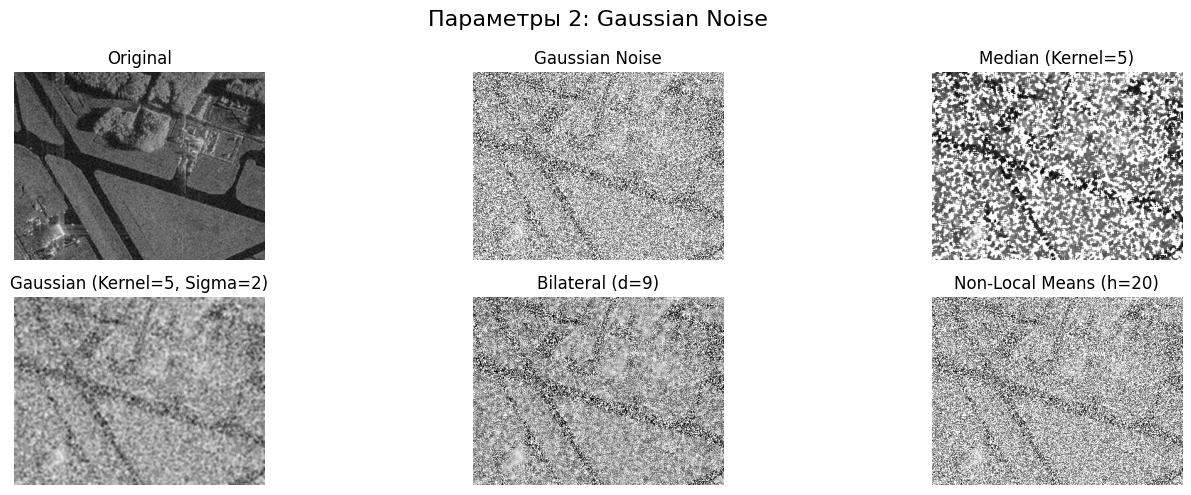

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

un = np.random.uniform(-50, 50, img.shape).astype(np.uint8)
img_un = cv2.add(img, un)

kernel_sizes = [3, 5] 
sigma_values = [1, 2] 
d_values = [5, 9] 
h_values = [10, 20] 

for i in range(2): 

    kernel_size = kernel_sizes[i]
    sigma = sigma_values[i]
    d = d_values[i]
    h = h_values[i]

    mf_gn = cv2.medianBlur(img_gn, kernel_size) 
    gf_gn = cv2.GaussianBlur(img_gn, (kernel_size, kernel_size), sigma)  
    bf_gn = cv2.bilateralFilter(img_gn, d, 75, 75) 
    nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, h, 7, 21) 

    mf_un = cv2.medianBlur(img_un, kernel_size)  
    gf_un = cv2.GaussianBlur(img_un, (kernel_size, kernel_size), sigma)  
    bf_un = cv2.bilateralFilter(img_un, d, 75, 75)  
    nlm_un = cv2.fastNlMeansDenoising(img_un, None, h, 7, 21)  
    
    titles_gn = ['Original', 'Gaussian Noise',
                 f'Median (Kernel={kernel_size})', f'Gaussian (Kernel={kernel_size}, Sigma={sigma})',
                 f'Bilateral (d={d})', f'Non-Local Means (h={h})']
    images_gn = [img, img_gn, mf_gn, gf_gn, bf_gn, nlm_gn]

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Параметры {i + 1}: Gaussian Noise', fontsize=16)
    for j in range(len(images_gn)):
        plt.subplot(2, 3, j + 1)
        plt.imshow(images_gn[j], cmap='gray')
        plt.title(titles_gn[j])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
print(f"PSNR for Median Filter (Gaussian, Kernel={kernel_size}):", psnr(img, mf_gn))
print(f"PSNR for Gaussian Filter (Gaussian, Kernel={kernel_size}, Sigma={sigma}):", psnr(img, gf_gn))
print(f"PSNR for Bilateral Filter (Gaussian, d={d}):", psnr(img, bf_gn))
print(f"PSNR for Non-Local Means (Gaussian, h={h}):", psnr(img, nlm_gn))

PSNR for Median Filter (Gaussian, Kernel=5): 27.522093093265614
PSNR for Gaussian Filter (Gaussian, Kernel=5, Sigma=2): 27.6225026892643
PSNR for Bilateral Filter (Gaussian, d=9): 27.968572419330325
PSNR for Non-Local Means (Gaussian, h=20): 28.131284978406278


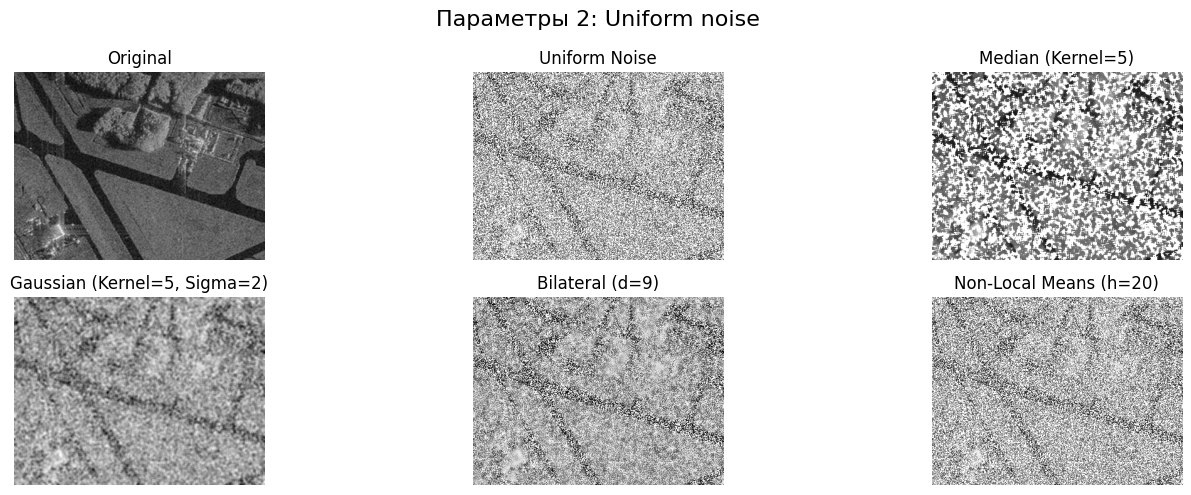

In [13]:
titles_un = ['Original', 'Uniform Noise',
             f'Median (Kernel={kernel_size})', f'Gaussian (Kernel={kernel_size}, Sigma={sigma})',
             f'Bilateral (d={d})', f'Non-Local Means (h={h})']
images_un = [img, img_un, mf_un, gf_un, bf_un, nlm_un]  # ✅ теперь правильно

plt.figure(figsize=(15, 5))
plt.suptitle(f'Параметры {i + 1}: Uniform noise', fontsize=16)
for j in range(len(images_un)):
    plt.subplot(2, 3, j + 1)
    plt.imshow(images_un[j], cmap='gray')
    plt.title(titles_un[j])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
print(f"PSNR for Median Filter (Uniform, Kernel={kernel_size}):", psnr(img, mf_un))
print(f"PSNR for Gaussian Filter (Uniform, Kernel={kernel_size}, Sigma={sigma}):", psnr(img, gf_un))
print(f"PSNR for Bilateral Filter (Uniform, d={d}):", psnr(img, bf_un))
print(f"PSNR for Non-Local Means (Uniform, h={h}):", psnr(img, nlm_un))

PSNR for Median Filter (Uniform, Kernel=5): 27.473370852195373
PSNR for Gaussian Filter (Uniform, Kernel=5, Sigma=2): 27.646887034856206
PSNR for Bilateral Filter (Uniform, d=9): 27.974786179926898
PSNR for Non-Local Means (Uniform, h=20): 27.897264061934493


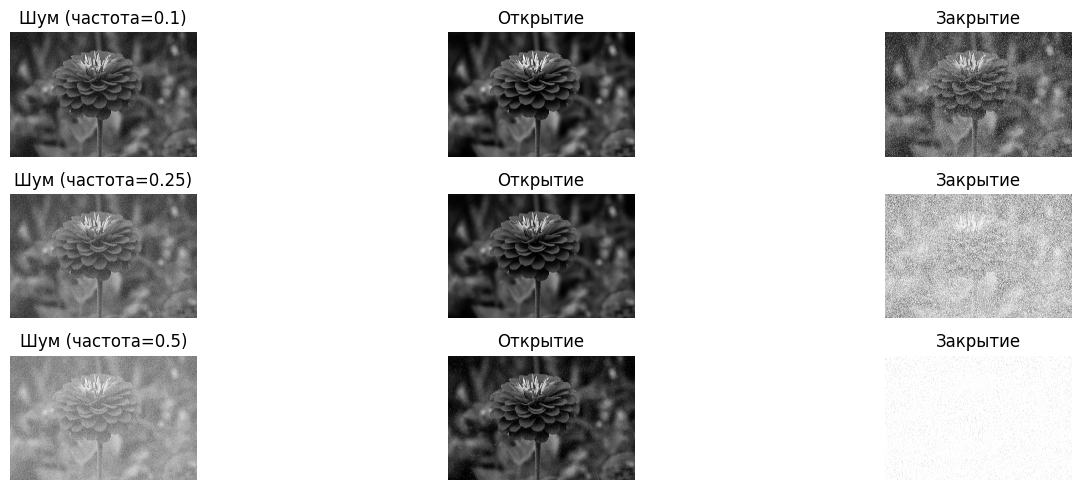

In [9]:
img2 = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
frequencies = [0.1, 0.25, 0.5]  
kernel = np.ones((3, 3), np.uint8) 
plt.figure(figsize=(15, 5))

for i, freq in enumerate(frequencies):
    spn = np.random.choice([0, 255], size=img2.shape, p=[1 - freq, freq])
    spn = spn.astype(np.uint8)  
    img2_sp = cv2.add(img2, spn)

    opening = cv2.morphologyEx(img2_sp, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(img2_sp, cv2.MORPH_CLOSE, kernel)

    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img2_sp, cmap='gray')
    plt.title(f'Шум (частота={freq})')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Открытие')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(closing, cmap='gray')
    plt.title('Закрытие')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# --- Сравнение результатов по PSNR ---
results_gn = {
    "Median": psnr(img, mf_gn),
    "Gaussian": psnr(img, gf_gn),
    "Bilateral": psnr(img, bf_gn),
    "NLM": psnr(img, nlm_gn)
}

results_un = {
    "Median": psnr(img, mf_un),
    "Gaussian": psnr(img, gf_un),
    "Bilateral": psnr(img, bf_un),
    "NLM": psnr(img, nlm_un)
}

# Выбор лучшего фильтра по максимальному PSNR
best_gn = max(results_gn, key=results_gn.get)
best_un = max(results_un, key=results_un.get)

# Вывод результатов
print(f"\n=== Параметры {i + 1} ===")
print("Gaussian noise:")
for k, v in results_gn.items():
    print(f"  {k}: PSNR = {v:.2f}")
print(f" Лучший фильтр для Gaussian noise: {best_gn} (PSNR={results_gn[best_gn]:.2f})")

print("\nUniform noise:")
for k, v in results_un.items():
    print(f"  {k}: PSNR = {v:.2f}")
print(f" Лучший фильтр для Uniform noise: {best_un} (PSNR={results_un[best_un]:.2f})")


=== Параметры 2 ===
Gaussian noise:
  Median: PSNR = 27.52
  Gaussian: PSNR = 27.62
  Bilateral: PSNR = 27.97
  NLM: PSNR = 28.13
 Лучший фильтр для Gaussian noise: NLM (PSNR=28.13)

Uniform noise:
  Median: PSNR = 27.47
  Gaussian: PSNR = 27.65
  Bilateral: PSNR = 27.97
  NLM: PSNR = 27.90
 Лучший фильтр для Uniform noise: Bilateral (PSNR=27.97)
